# Assignment 05: Control Charts for Variables II
Sydney Perrin

February 14th, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df=pd.read_csv('05 data.csv')
#df.head(100)

## 1. The thickness of a printed circuit board is an important quality parameter. Data on board thickness (in inches) are given in the dataset for 25 samples of three boards each. Set up X-bar and R control charts. Is the process in statistical control?
ANS: See X-bar and R charts in the code below. No, the process is not in statistical control because there are points out of bounds in the control charts.

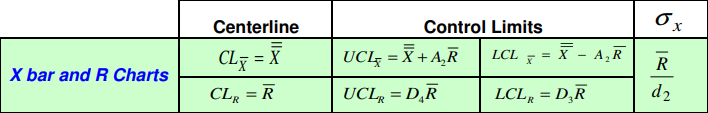

### R Chart Calculations

In [3]:
m=25 # number of samples
n=3 # sample size

Rvalues = df.groupby(['Sample Number']).Thickness.max()-df.groupby(['Sample Number']).Thickness.min()
Rbar = Rvalues.mean()
CL_R = Rbar

# Control chart constants for n=3
A2=1.023
d2=1.693
D3=0
D4 = 2.574

UCL_R = D4*Rbar
LCL_R = D3*Rbar

print('CL_R=', CL_R)
print('UCL_R=', UCL_R)
print('LCL_R=', LCL_R)

CL_R= 0.0009199999999999997
UCL_R= 0.002368079999999999
LCL_R= 0.0


### Plot R Chart

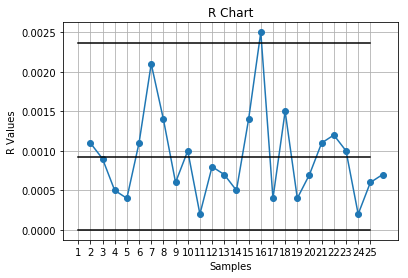

In [4]:
m=25
ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R) 
cl_line = np.full(m,CL_R)
plt.plot(Rvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R Chart')
plt.ylabel('R Values')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate in Q2.

### X-bar Chart Calculations

In [5]:
xbarvalues = df.groupby(['Sample Number']).Thickness.mean()
xbarbar= np.mean(xbarvalues)
CL_X = xbarbar

UCL_X = xbarbar + A2*Rbar
LCL_X = xbarbar - A2*Rbar

print('CL_X=', CL_X)
print('UCL_X=', UCL_X)
print('LCL_X=', LCL_X)

CL_X= 0.062952
UCL_X= 0.06389315999999999
LCL_X= 0.06201084


### Plot X-bar Chart

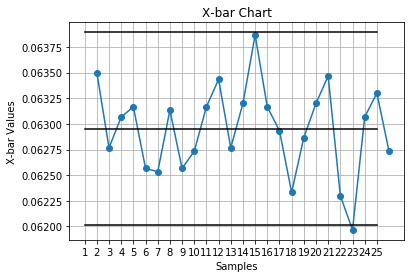

In [6]:
m=25
ucl_line = np.full(m,UCL_X) 
lcl_line = np.full(m,LCL_X) 
cl_line = np.full(m,CL_X)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds.

## 2. What is the new value of R-bar after deleting the points lying out of bounds?
ANS: The new value of is Rbar=0.000854

### Iterate

In [7]:
Rvalues = Rvalues[(Rvalues > LCL_R) & (Rvalues < UCL_R)]
Rbar = Rvalues.mean()
CL_R = Rbar
print('Rbar=', Rbar)

Rbar= 0.0008541666666666663


In [8]:
UCL_R = D4*Rbar
LCL_R = D3*Rbar

print('UCL_R=', UCL_R)
print('LCL_R=', LCL_R)

UCL_R= 0.0021986249999999988
LCL_R= 0.0


### Plot to check no remaining points out of bounds

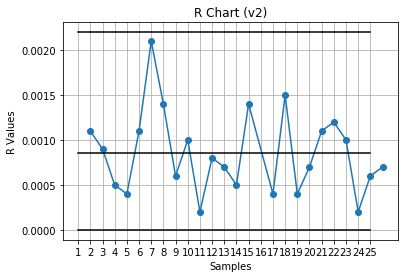

In [9]:
m=25
ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R) 
cl_line = np.full(m,CL_R)
plt.plot(Rvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R Chart (v2)')
plt.ylabel('R Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 3. Based on the R chart obtained in the previous question, what is the estimate value of the standard deviation for this process?
ANS: The estimated standard deviation is sigma=0.000505

In [10]:
sigma=Rbar/d2
print('sigma=',sigma)

sigma= 0.0005045284504823781


## 4. What are the new values for the CL, UCL and LCL in the X-bar chart when all the points lying out of bounds are excluded?
ANS: The new values are CL=0.06299, UCL=0.0639 and LCL=0.0621

### Iterate

In [11]:
xbarvalues = xbarvalues[(xbarvalues > LCL_X)&(xbarvalues < UCL_X)]
xbarbar = xbarvalues.mean()
CL_X = xbarbar

UCL_X = xbarbar + A2*Rbar
LCL_X = xbarbar - A2*Rbar

print('CL_X=', CL_X)
print('UCL_X=', UCL_X)
print('LCL_X=', LCL_X)

CL_X= 0.06299305555555555
UCL_X= 0.06386686805555555
LCL_X= 0.06211924305555555


### Plot to check no remaining points out of bounds

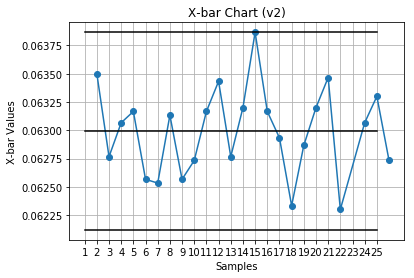

In [12]:
m=25
ucl_line = np.full(m,UCL_X) 
lcl_line = np.full(m,LCL_X) 
cl_line = np.full(m,CL_X)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart (v2)')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 5. Now set up X-bar and S charts for this process. Is the process in statistical control?
ANS: See X-bar and S charts in the code below. No, the process is not in statistical control because there are points out of bounds in the control charts.

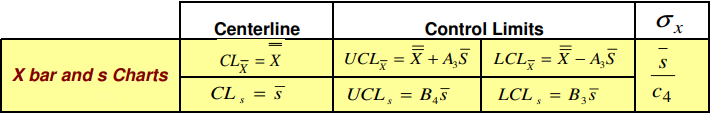

### s Chart Calculations

In [13]:
svalues = df.groupby(['Sample Number']).Thickness.std()
sbar = svalues.mean()
CL_s = sbar

# Control chart constants for n=3
A3 = 1.954
c4 = 0.8862
B3 = 0
B4 = 2.568

UCL_s = B4*sbar
LCL_s = B3*sbar

print('CL_s=', CL_s)
print('UCL_s=', UCL_s)
print('LCL_s=', LCL_s)

CL_s= 0.0004781711498741441
UCL_s= 0.001227943512876802
LCL_s= 0.0


### Plot s Chart

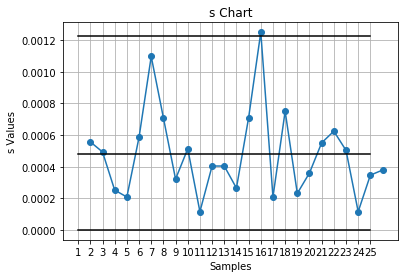

In [14]:
m=25
ucl_line = np.full(m,UCL_s)
lcl_line = np.full(m,LCL_s)
cl_line = np.full(m,CL_s) 
plt.plot(svalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('s Chart')
plt.ylabel('s Values')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate in Q6.

### X-bar Chart Calculations

In [15]:
xbarvalues = df.groupby(['Sample Number']).Thickness.mean()
xbarbar = xbarvalues.mean() 
CL_x = xbarbar 

UCL_x = xbarbar + A3*sbar
LCL_x = xbarbar - A3*sbar


print('CL_x=', CL_x)
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

CL_x= 0.062952
UCL_x= 0.06388634642685408
LCL_x= 0.06201765357314592


### Plot X-bar Chart

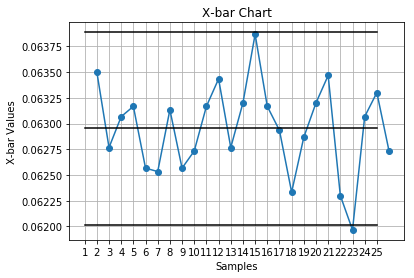

In [16]:
m=25
ucl_line = np.full(m,UCL_x) 
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

# There is a point out of bounds. Iterate in Q8.

## 6. After deleting the out-of-control points, what should be the upper and lower control limits for the S chart?
ANS: The upper and lower control limits for the S chart are UCL=0.00115 and LCL=0

### Iterate

In [17]:
svalues = svalues[(svalues > LCL_s)&(svalues < UCL_s)]
sbar = svalues.mean()
CL_s = sbar

UCL_s = B4*sbar
LCL_s = B3*sbar

print('CL_s=', CL_s)
print('UCL_s=', UCL_s)
print('LCL_s=', LCL_s)

CL_s= 0.0004459977274147027
UCL_s= 0.0011453221640009565
LCL_s= 0.0


### Plot to check no remaining points out of bounds

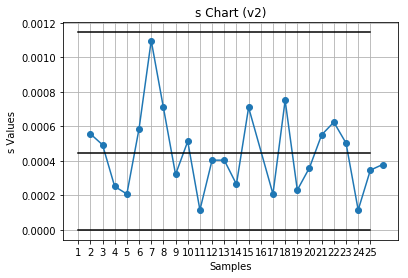

In [18]:
m=25
ucl_line = np.full(m,UCL_s)
lcl_line = np.full(m,LCL_s)
cl_line = np.full(m,CL_s) 
plt.plot(svalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('s Chart (v2)')
plt.ylabel('s Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 7. Based on the S chart obtained in the previous question, what is the estimate of the standard deviation for this process?
ANS: The estimate of the standard deviation is sigma=0.000503

In [19]:
sigma = sbar/c4
print('sigma=', sigma)

sigma= 0.0005032698345911788


## 8. What are the upper and lower control limits for the in-control X-bar chart?
ANS: The upper and lower control limits for the in-control X-bar chart are UCL=0.0638 and LCL=0.0621

### Iterate

In [20]:
xbarvalues = xbarvalues[(xbarvalues > LCL_x)&(xbarvalues < UCL_x)]
xbarbar = xbarvalues.mean()
CL_x = xbarbar

UCL_x = xbarbar + A3*sbar
LCL_x = xbarbar - A3*sbar

print('CL_x=', CL_x)
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

CL_x= 0.06299305555555555
UCL_x= 0.06386453511492388
LCL_x= 0.06212157599618722


### Plot to check no remaining points out of bounds

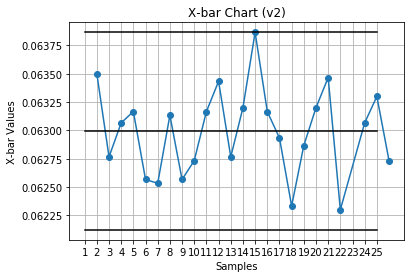

In [21]:
m=25
ucl_line = np.full(m,UCL_x) 
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart (v2)')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

# Check
# print(xbarvalues < UCL_x) 

# There is a point out of bounds. Iterate again.

### Iterate

In [22]:
xbarvalues = xbarvalues[(xbarvalues > LCL_x)&(xbarvalues < UCL_x)]
xbarbar = xbarvalues.mean()
CL_x = xbarbar

UCL_x = xbarbar + A3*sbar
LCL_x = xbarbar - A3*sbar

print('CL_x=', CL_x)
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

CL_x= 0.06295507246376811
UCL_x= 0.06382655202313643
LCL_x= 0.06208359290439978


### Plot to check no remaining points out of bounds

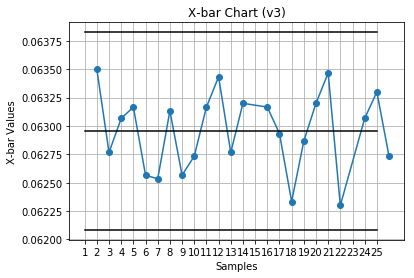

In [23]:
m=25
ucl_line = np.full(m,UCL_x) 
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart (v3)')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 9. The concentration of the active ingredient in a liquid cleaner produced in a continuous chemical process is monitored by X-bar and S charts. A batch is taken as a rational subgroup. The sample sizes vary from batch to batch, with production ranging from four to eight but with six as the predominant sample size. The past 12 batches of output resulted in the data presented in the dataset. Set up X-bar and S charts for this process. Is it in statistical control?
ANS: See X-bar and s charts in the code below. Yes, the process is in statistical control because there are no points out of bounds in the control charts.

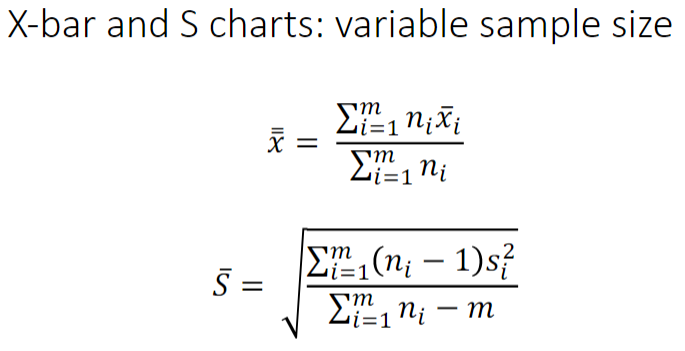

### Evaluate xbarbar and sbar formulas

In [24]:
df2=pd.DataFrame()
df2['n']=df.groupby(['Batch']).Batch.count()
df2['xbarvalues']=df.groupby(['Batch']).Concentration.mean()
df2['svalues']=df.groupby(['Batch']).Concentration.std()
df2['si2']=df.groupby(['Batch']).Concentration.var() #ddof=1 by default
df2['prod_n_xbar']=df2.n*df2.xbarvalues
df2['nm1']=df2.n-1
df2['prod_nm1_si2']=df2.nm1*df2.si2
df2=df2.reset_index()
df2.head(12)

,Batch,n,xbarvalues,svalues,si2,prod_n_xbar,nm1,prod_nm1_si2
0,1.0,6,95.733333,1.146589,1.314667,574.4,5,6.573333
1,2.0,6,95.466667,1.250067,1.562667,572.8,5,7.813333
2,3.0,4,96.650000,1.594783,2.543333,386.6,3,7.630000
3,4.0,5,97.460000,0.820366,0.673000,487.3,4,2.692000
4,5.0,6,96.866667,1.587031,2.518667,581.2,5,12.593333
5,6.0,4,96.850000,1.461734,2.136667,387.4,3,6.410000
6,7.0,8,96.525000,1.330682,1.770714,772.2,7,12.395000
7,8.0,4,96.075000,1.099621,1.209167,384.3,3,3.627500
8,9.0,6,97.233333,1.482790,2.198667,583.4,5,10.993333
9,10.0,5,96.540000,0.801873,0.643000,482.7,4,2.572000


In [25]:
num=df2.prod_n_xbar.sum()
den=df2.n.sum()
xbarbar=num/den
#print(num,den,xbarbar)

In [26]:
num=df2.prod_nm1_si2.sum()
den=df2.n.sum()-df2.n.count()
sbar=np.sqrt(num/den)
#print(num,den,sbar)

### Control Chart Constants

In [27]:
CCC=pd.DataFrame()
CCC['n']=[4,5,6,7,8]
CCC['A3']=[1.628,1.427,1.287,1.182,1.099]
CCC['B3']=[0,0,0.03,0.118,0.185]
CCC['B4']=[2.266,2.089,1.97,1.882,1.815]
CCC.head()

,n,A3,B3,B4
0,4,1.628,0.000,2.266
1,5,1.427,0.000,2.089
2,6,1.287,0.030,1.970
3,7,1.182,0.118,1.882
4,8,1.099,0.185,1.815


### Calculate Control Limits

In [28]:
df3 = pd.merge(df2[['Batch','xbarvalues','svalues','n']], CCC, how='inner', on = 'n')
df3['sLCL']=df3.B3*sbar
df3['sUCL']=df3.B4*sbar
df3['xUCL']=xbarbar+df3.A3*sbar
df3['xLCL']=xbarbar-df3.A3*sbar
df3.sort_values(by=['Batch'], inplace=True)
df3=df3.set_index('Batch')
df3.head(12)

,xbarvalues,svalues,n,A3,B3,B4,sLCL,sUCL,xUCL,xLCL
Batch,,,,,,,,,,
1.0,95.733333,1.146589,6,1.287,0.030,1.970,0.038145,2.504846,98.165646,94.892816
2.0,95.466667,1.250067,6,1.287,0.030,1.970,0.038145,2.504846,98.165646,94.892816
3.0,96.650000,1.594783,4,1.628,0.000,2.266,0.000000,2.881209,98.599226,94.459236
4.0,97.460000,0.820366,5,1.427,0.000,2.089,0.000000,2.656154,98.343655,94.714806
5.0,96.866667,1.587031,6,1.287,0.030,1.970,0.038145,2.504846,98.165646,94.892816
6.0,96.850000,1.461734,4,1.628,0.000,2.266,0.000000,2.881209,98.599226,94.459236
7.0,96.525000,1.330682,8,1.099,0.185,1.815,0.235227,2.307765,97.926605,95.131857
8.0,96.075000,1.099621,4,1.628,0.000,2.266,0.000000,2.881209,98.599226,94.459236
9.0,97.233333,1.482790,6,1.287,0.030,1.970,0.038145,2.504846,98.165646,94.892816


### Plot s Chart

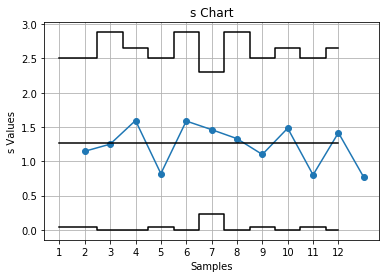

In [29]:
CL=sbar

m=12
ucl_line = np.full(m,df3.sUCL) 
lcl_line = np.full(m,df3.sLCL) 
cl_line = np.full(m,CL) 
plt.plot(df3.svalues,marker="o")
plt.plot(ucl_line,color='k', drawstyle='steps-mid')
plt.plot(lcl_line,color='k', drawstyle='steps-mid')
plt.plot(cl_line,color='k')
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 
plt.grid(True)
plt.title('s Chart')
plt.ylabel('s Values')
plt.xlabel('Samples')
plt.show()

### Plot X-bar Chart

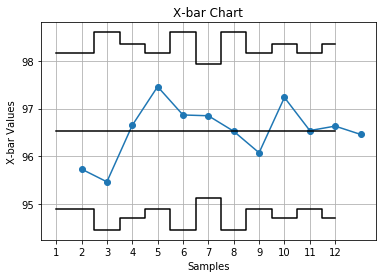

In [30]:
CL=xbarbar

m=12
ucl_line = np.full(m,df3.xUCL) 
lcl_line = np.full(m,df3.xLCL) 
cl_line = np.full(m,CL) 
plt.plot(df3.xbarvalues,marker="o")
plt.plot(ucl_line,color='k', drawstyle='steps-mid')
plt.plot(lcl_line,color='k', drawstyle='steps-mid')
plt.plot(cl_line,color='k')
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 
plt.grid(True)
plt.title('X-bar Chart')
plt.ylabel('X-bar Values')
plt.xlabel('Samples')
plt.show()

## 10. What is the value of S-bar?
ANS: The value is sbar=1.27

In [31]:
print('sbar=', sbar)

sbar= 1.271495677484447


## 11. What is the estimate of the mean of this process?
ANS: The estimate is mean=96.53

In [32]:
print('mean=', xbarbar)

mean= 96.52923076923076
